In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
data = pd.read_csv(url, header=None)

In [ ]:
# Split the features and labels
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


In [ ]:
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the input features
X_train = X_train / 15.0
X_test = X_test / 15.0


In [ ]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)


Epoch 1/20
400/400 [==============================] - 2s 3ms/step - loss: 2.4350 - accuracy: 0.3634 - val_loss: 1.7076 - val_accuracy: 0.5425
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 1.4442 - accuracy: 0.6007 - val_loss: 1.3301 - val_accuracy: 0.6434
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 1.2150 - accuracy: 0.6668 - val_loss: 1.1809 - val_accuracy: 0.6966
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 1.0924 - accuracy: 0.7023 - val_loss: 1.1051 - val_accuracy: 0.6938
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 1.0088 - accuracy: 0.7259 - val_loss: 0.9944 - val_accuracy: 0.7316
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 0.9390 - accuracy: 0.7454 - val_loss: 0.9613 - val_accuracy: 0.7375
Epoch 7/20
400/400 [==============================] - 1s 4ms/step - loss: 0.8908 - accuracy: 0.7550 - val_loss: 0.9084 - val_accuracy: 0.7487
Epoch 

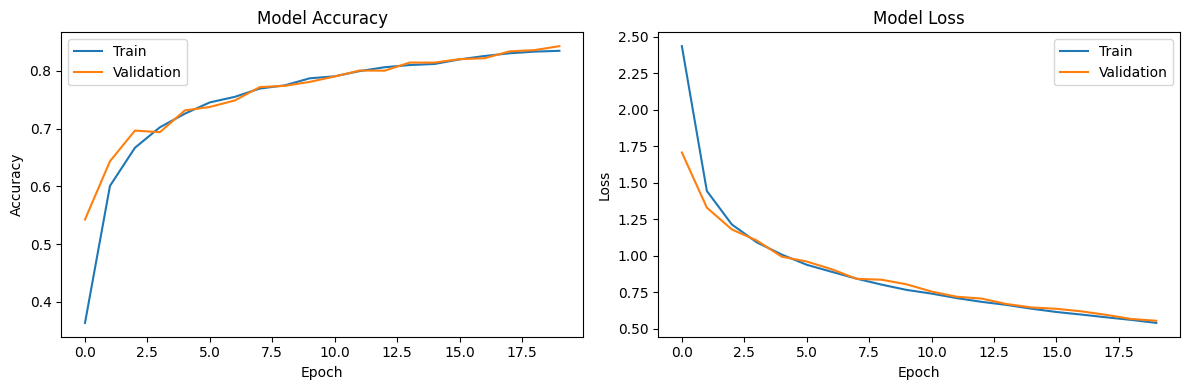

In [ ]:
# Plot the accuracy and loss graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)


125/125 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8403
Test Accuracy: 0.8402500152587891


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels)


125/125 [==============================] - 0s 3ms/step


In [ ]:
# Display sample predictions
for i in range(10):
    print('True Label:', label_encoder.inverse_transform([np.argmax(y_test[i])])[0])
    print('Predicted Label:', predicted_labels[i])
    print('---')

True Label: T
Predicted Label: Z
---
True Label: L
Predicted Label: T
---
True Label: A
Predicted Label: A
---
True Label: E
Predicted Label: E
---
True Label: Q
Predicted Label: Q
---
True Label: E
Predicted Label: E
---
True Label: O
Predicted Label: O
---
True Label: Q
Predicted Label: Q
---
True Label: G
Predicted Label: G
---
True Label: O
Predicted Label: O
---
